## Conjunto de dados de vendas de videogame

In [37]:
# Libs Necessárias

# Libs para Modelagem e Matrizez
import numpy as np
import pandas as pd

# Libs para anaálises gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')



In [2]:
# lendo os dados
df = pd.read_csv('/home/cassio/Documentos/Analise de Dados Python/Projetos_curso/Projeto_4/PS4_GamesSales.csv', encoding='latin-1')

# Verificando
df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [3]:
import chardet

with open('/home/cassio/Documentos/Analise de Dados Python/Projetos_curso/Projeto_4/PS4_GamesSales.csv', 'rb') as f:
    dados = f.read()

resultado = chardet.detect(dados)
print(f"Codificação: {resultado['encoding']}")
print(f"Confiança: {resultado['confidence']}%")

Codificação: Windows-1252
Confiança: 0.7268063239276868%


##### Começando as verificações

In [4]:
df

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1029,Fallen Legion: Flames of Rebellion,NaN,Role-Playing,NaN,0.00,0.00,0.00,0.00,0.00
1030,Radial G Racing Revolved,2017.0,Racing,Tammeka Games,0.00,0.00,0.00,0.00,0.00
1031,The Mummy Demastered,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00
1032,Project Nimbus: Code Mirai,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00


In [5]:
df.shape

(1034, 9)

In [6]:
df.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000
mean,2015.966061,0.204613,0.248714,0.033636,0.089014,0.576054
std,1.298360,0.563471,0.785491,0.108344,0.249410,1.583534
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.000000,0.020000,0.000000,0.000000,0.010000,0.060000
75%,2017.000000,0.120000,0.130000,0.030000,0.050000,0.357500
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           1034 non-null   object 
 1   Year           825 non-null    float64
 2   Genre          1034 non-null   object 
 3   Publisher      825 non-null    object 
 4   North America  1034 non-null   float64
 5   Europe         1034 non-null   float64
 6   Japan          1034 non-null   float64
 7   Rest of World  1034 non-null   float64
 8   Global         1034 non-null   float64
dtypes: float64(6), object(3)
memory usage: 72.8+ KB


In [8]:
df.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

In [9]:
df.duplicated().sum()

0

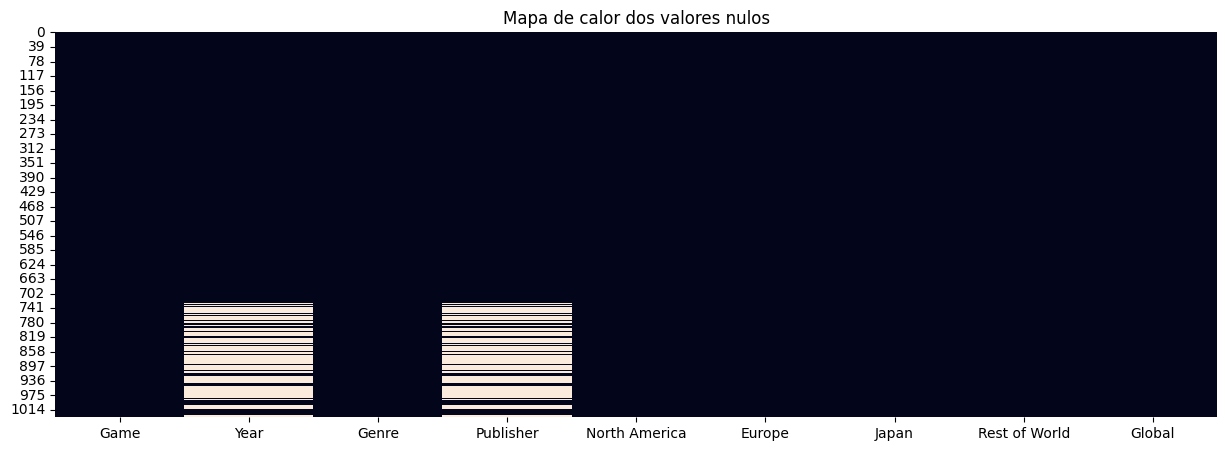

In [10]:
# Gráfico dos valores nulos
plt.figure(figsize=(15,5))
plt.title('Mapa de calor dos valores nulos')
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [11]:
# Retirando os valores nulos
df.dropna(inplace=True)

In [12]:
df.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


#### Vendas Anuais Global

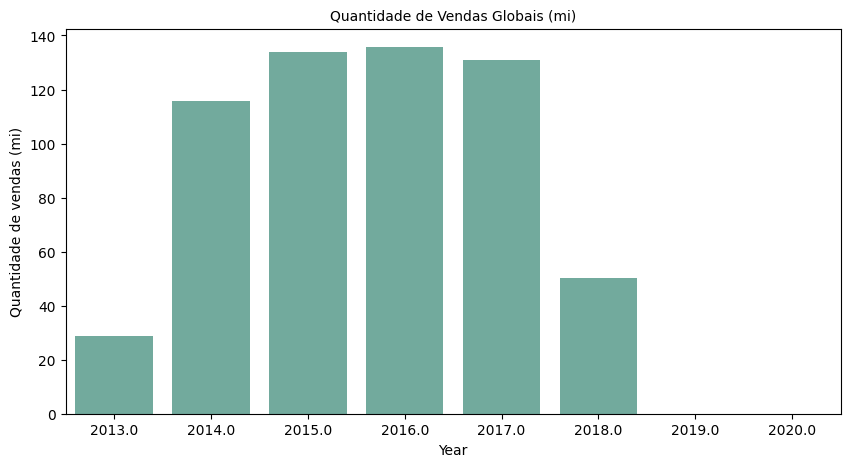

In [13]:
# Tamanho da figura
plt.figure(figsize=(10,5))
# Título
plt.title('Quantidade de Vendas Globais (mi)', fontsize=10)
# Grafico
sns.barplot(df, x='Year', y='Global', errorbar=None, color='#69b3a2', estimator='sum')
plt.ylabel('Quantidade de vendas (mi)')
plt.show()

In [14]:
# Em 2019 e 2020 não foram feito vendas então retiraremos esses valores
df = df.loc[(df.Year != 2020) & (df.Year != 2019)]

df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


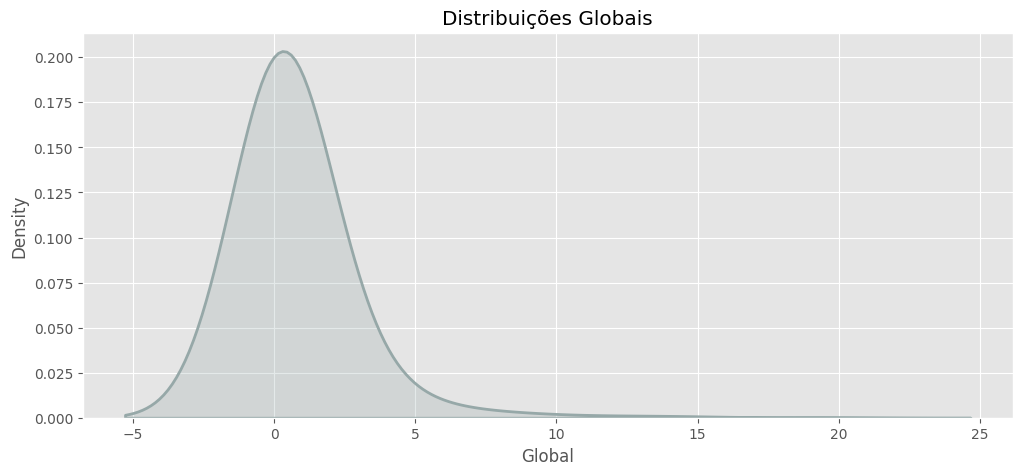

In [15]:
# Tamanho
plt.figure(figsize=(12,5))
# Estilo
plt.style.use('ggplot')
# Título
plt.title('Distribuições Globais')
# Plot
sns.kdeplot(df['Global'], fill=True, bw_method=1, color='#96a8a8', linewidth=2)
plt.show()

In [16]:
df.loc[:,~df.columns.isin(['Game', 'Genre', 'Publisher'])].groupby(by=['Year']).sum()

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20


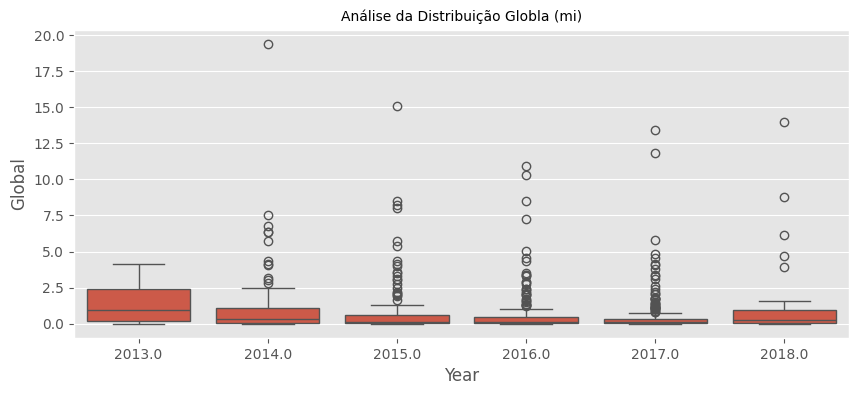

In [17]:
# Tamanho
plt.figure(figsize=(10,4))
# Título
plt.title('Análise da Distribuição Globla (mi)', fontsize=10)
# Plot
sns.boxplot(data=df, x='Year', y='Global')
plt.show()

In [18]:
df.loc[df['Global'] >= 10]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [19]:
analise = df.groupby('Year').sum().reset_index()
# analisando a proporção dos 100% de cada continemente comparado ao Total
America = [America / Total * 100 for America, Total in zip(analise['North America'], analise['Global'])]
Europa = [Europa / Total * 100 for Europa, Total in zip(analise['Europe'], analise['Global'])]
Japao = [Japao / Total * 100 for Japao, Total in zip(analise['Japan'], analise['Global'])]
Mundo = [Mundo / Total * 100 for Mundo, Total in zip(analise['Rest of World'], analise['Global'])]

America, Europa, Japao, Mundo

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

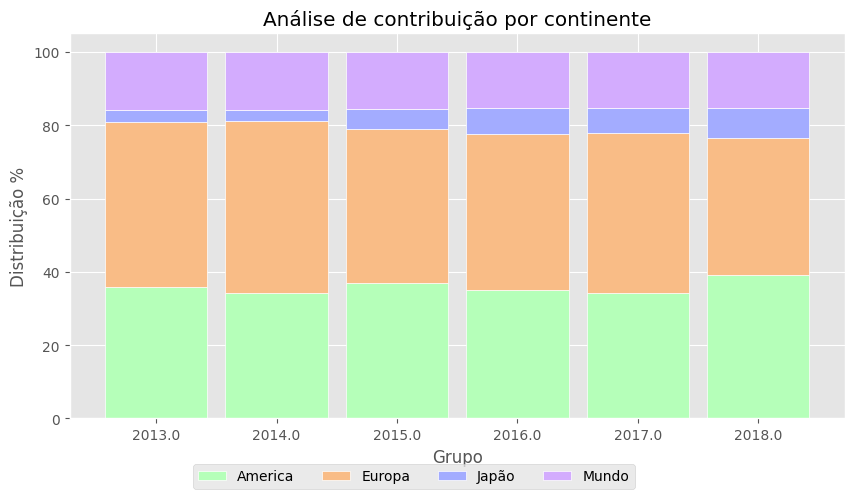

In [25]:
# Tamanho do gráfico
plt.figure(figsize=(10,5))

# Largura barra no gráfico
largura_barra = 0.85
rotulos = analise['Year']
grupos = [0, 1, 2, 3, 4, 5]

# Título
plt.title('Análise de contribuição por continente')

# Plot da America
plt.bar(grupos, America, width=largura_barra, color='#b5ffb9', edgecolor='white')

# Plot da Europa
plt.bar(grupos, Europa, bottom=America, width=largura_barra, color='#f9bc86', edgecolor='white')

# Plot do Japao
plt.bar(grupos, Japao,bottom=[A + B for A, B in zip(America, Europa)], width=largura_barra, color='#a3acff', edgecolor='white')

# Plot do Resto do Mundo
plt.bar(grupos, Mundo, bottom=[A + B + C for A, B, C in zip(America, Europa, Japao)], width=largura_barra, color= '#d3acfe', edgecolor= 'white')

# Labels
plt.xticks(grupos, rotulos)
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')

# Legenda
plt.legend(['America', 'Europa', 'Japão', 'Mundo'], loc= 'upper left', bbox_to_anchor=(0.15, -0.1), ncol= 4)
plt.show()

In [27]:
df['Publisher'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

In [28]:
from sklearn.preprocessing import LabelEncoder
Funcao_Label = LabelEncoder()

df['Produtor'] = Funcao_Label.fit_transform( df['Publisher'] )
df['Genero'] = Funcao_Label.fit_transform( df['Genre'] )
df['Jogo'] = Funcao_Label.fit_transform( df['Game'] )

df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


In [29]:
Paleta_Cores = sns.color_palette('husl', 8)
Paleta_Cores

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

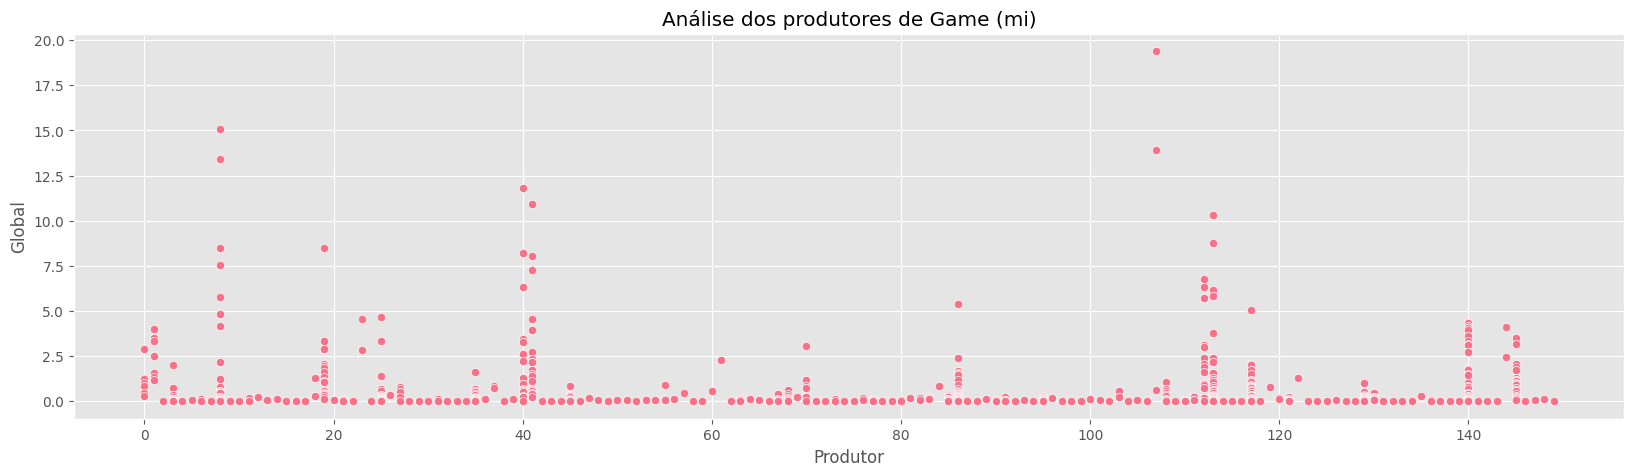

In [32]:
plt.figure( figsize=(20,5))
plt.title('Análise dos produtores de Game (mi)')
sns.scatterplot(data=df, x='Produtor', y='Global', color=Paleta_Cores[0] )
plt.show()

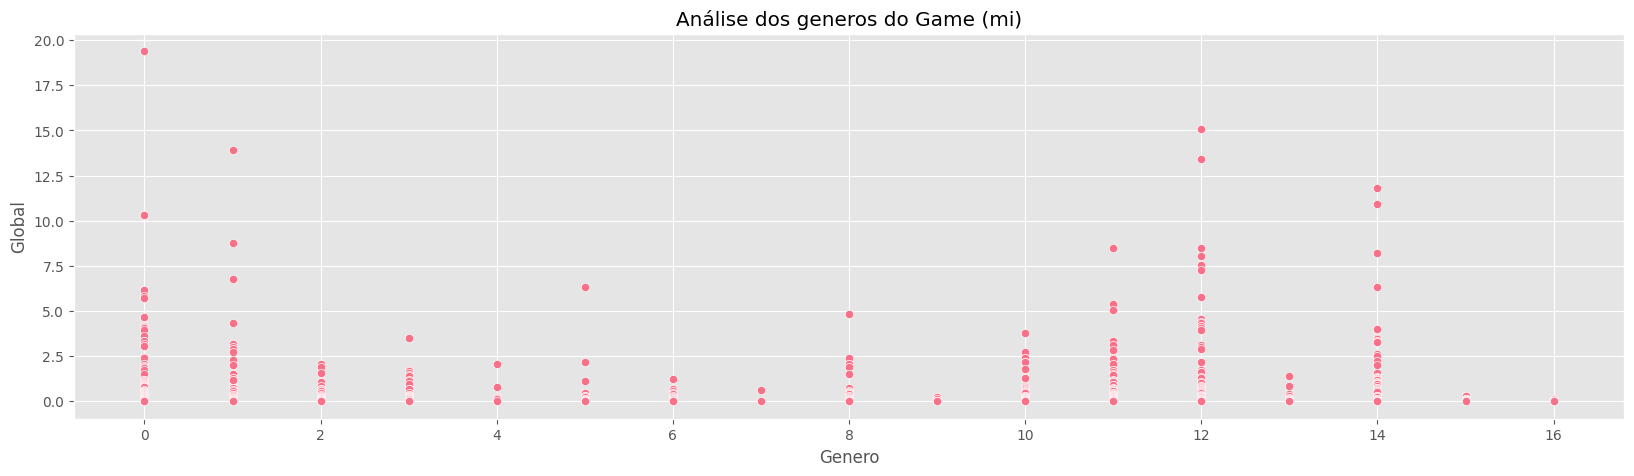

In [33]:
plt.figure( figsize=(20,5))
plt.title('Análise dos generos do Game (mi)')
sns.scatterplot(data=df, x='Genero', y='Global', color=Paleta_Cores[0] )
plt.show()

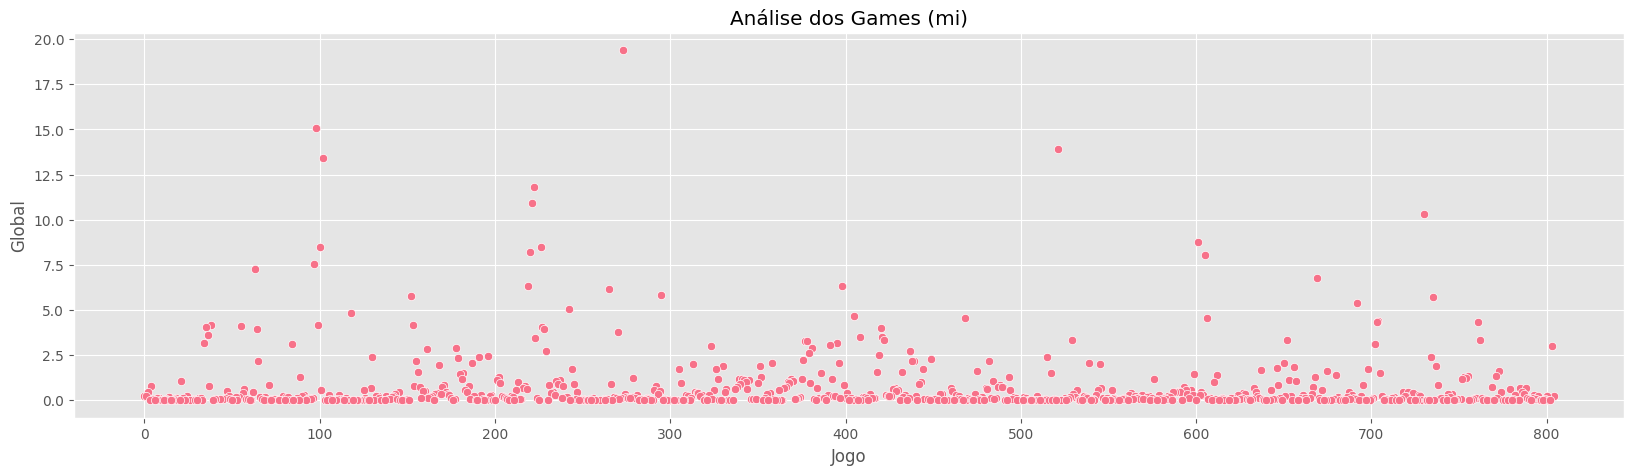

In [34]:
plt.figure( figsize=(20,5))
plt.title('Análise dos Games (mi)')
sns.scatterplot(data=df, x='Jogo', y='Global', color=Paleta_Cores[0] )
plt.show()

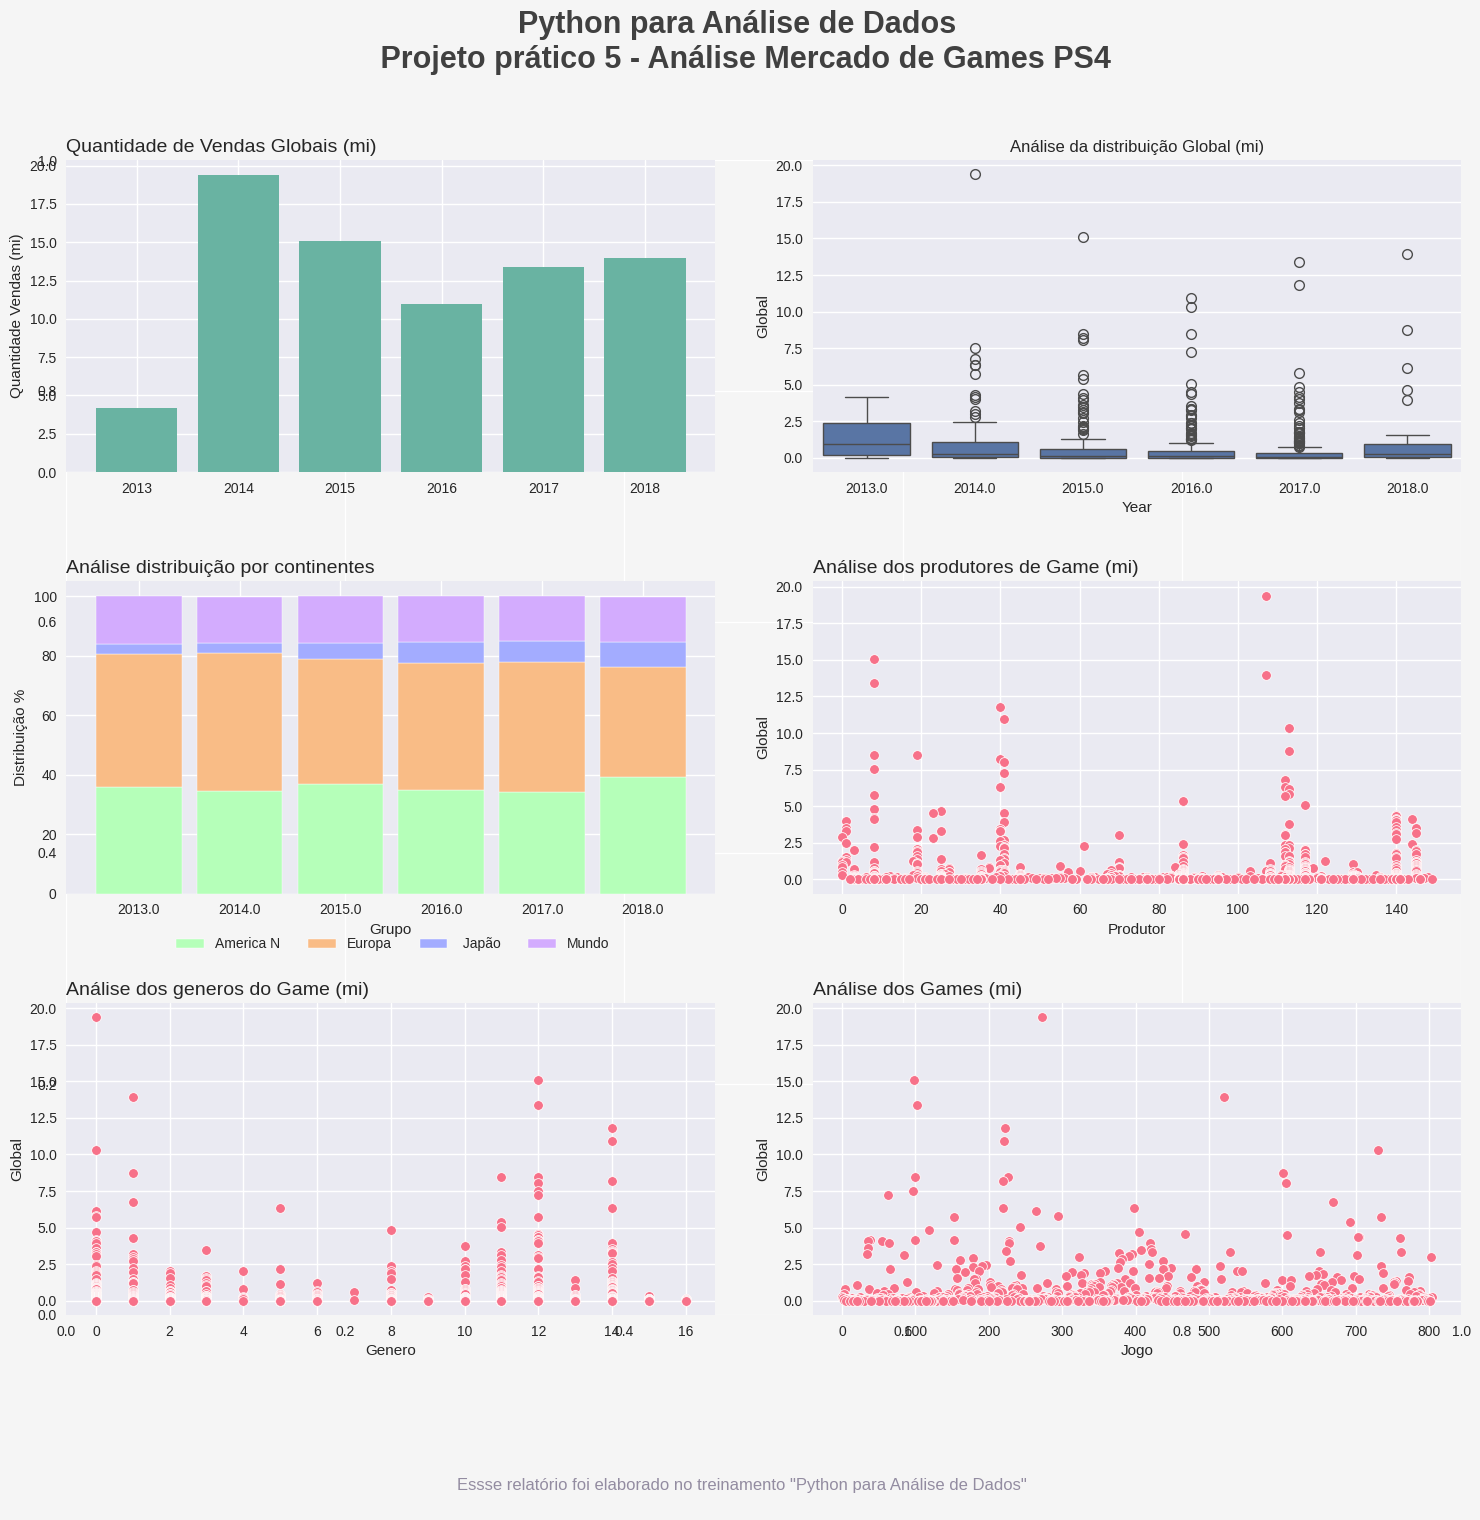

In [43]:
# Relatorio --> Report para o Chefe

# Tamanho da Imagem
fig, ax = plt.subplots( figsize=(18, 15) )

# Cor de fundo
Cor_Fundo = '#f5f5f5'
ax.set_facecolor( Cor_Fundo )
fig.set_facecolor( Cor_Fundo )

# Estilo dos gráficos
plt.style.use('seaborn-v0_8')

# Titulo da figura
plt.suptitle('Python para Análise de Dados \n Projeto prático 5 - Análise Mercado de Games PS4', fontsize=22, color='#404040', fontweight=600 )

# Parametros para o grid
Linhas = 3
Colunas = 2

# Acessando gráfico 1
plt.subplot( Linhas, Colunas, 1)
# Titulo
plt.title('Quantidade de Vendas Globais (mi)', loc='left', fontsize=14 )
# Grafico
plt.bar( df['Year'], df['Global'], color='#69b3a2' )
# Label
plt.ylabel('Quantidade Vendas (mi)')


# Acessando gráfico 2
plt.subplot( Linhas, Colunas, 2)
# titulo
plt.title('Análise da distribuição Global (mi)')
# Plot
sns.boxplot( data=df, x='Year', y='Global')


# Acessando gráfico 3
plt.subplot( Linhas, Colunas, 3)
# LArgura barra no gráfico
Largura_Barra = 0.85
Rotulos = analise['Year']
Grupos = [0, 1, 2, 3, 4, 5]
# titulo
plt.title('Análise distribuição por continentes', loc='left', fontsize=14)
# Plot da America
plt.bar( Grupos, America, width=Largura_Barra, color='#b5ffb9', edgecolor='white' )
# Plot da Europa
plt.bar( Grupos, Europa, bottom=America, width=Largura_Barra, color='#f9bc86', edgecolor='white' )
# Plot do Japao
plt.bar( Grupos, Japao, bottom=[ A + B for A, B in zip(America, Europa) ], width=Largura_Barra, color='#a3acff', edgecolor='white' )
# Plot do Resto do mundo
plt.bar( Grupos, Mundo, bottom=[ A + B + C for A, B, C in zip(America, Europa, Japao) ], width=Largura_Barra, color='#d3acfe', edgecolor='white' )
# Labels
plt.xticks( Grupos, Rotulos )
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')
# Legenda
plt.legend( ['America N', 'Europa',' Japão', 'Mundo'], loc='upper left', bbox_to_anchor=(0.15, -0.1), ncol=4 );


# Acessando gráfico 4
plt.subplot( Linhas, Colunas, 4)
plt.title('Análise dos produtores de Game (mi)', loc='left', fontsize=14 )
sns.scatterplot(data=df, x='Produtor', y='Global', color=Paleta_Cores[0] )


# Acessando gráfico 5
plt.subplot( Linhas, Colunas, 5)
plt.title('Análise dos generos do Game (mi)', loc='left', fontsize=14)
sns.scatterplot(data=df, x='Genero', y='Global', color=Paleta_Cores[0] )


# Acessando gráfico 6
plt.subplot( Linhas, Colunas, 6)
plt.title('Análise dos Games (mi)', loc='left', fontsize=14)
sns.scatterplot(data=df, x='Jogo', y='Global', color=Paleta_Cores[0] )


# Ajustar o layout
plt.subplots_adjust( hspace=0.35, wspace=0.15 )

# Rodapé
Rodape = '''
Essse relatório foi elaborado no treinamento "Python para Análise de Dados"
'''

# Incluindo o rodape no relatorio
fig.text( 0.5, -0.02, Rodape, ha='center', va='bottom', size=12, color='#938ca1')
plt.show()